In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Define the range for n and the number of plots
colors = ['red', 'blue', 'green', 'purple', 'orange']
n_values = [1.0, 0.5, 0.25, 0.125, 0.005]  # Using 0.01 to avoid division by zero
e = np.e # The mathematical constant e

C:\Users\raul.lahoz.sanz\AppData\Local\Temp\ipykernel_14208\1340313961.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)


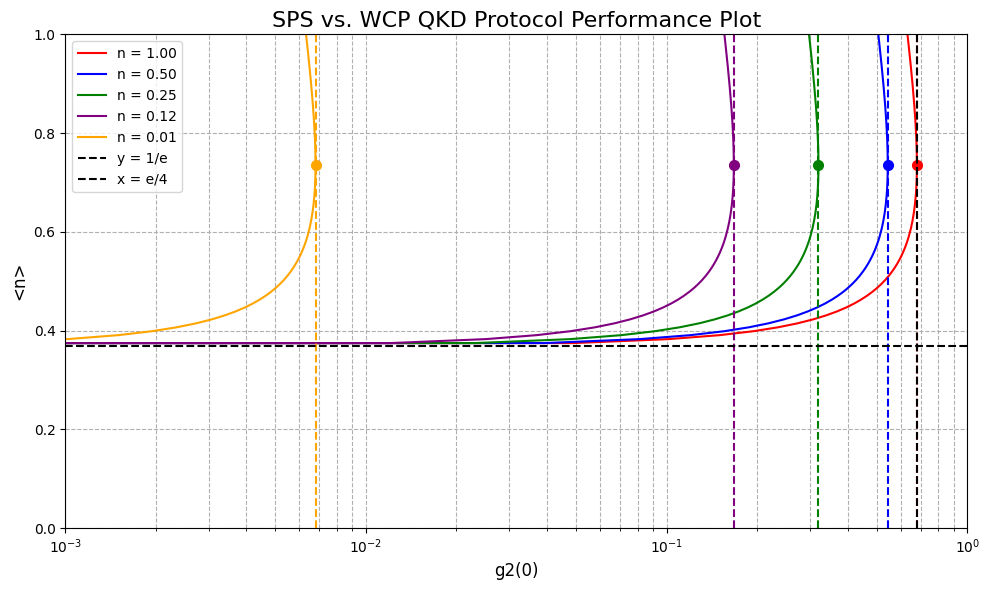

In [17]:
# Setup the plot with a logarithmic x-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
ax.set_xlim(1e-3, 1)
ax.set_ylim(0, 1)

# Plot for each value of n
for i, n in enumerate(n_values):
    # Select a color from the list using the loop index
    color = colors[i % len(colors)]

    # Generate x values on a logarithmic scale
    y = np.linspace(-3, 1, 500)

    # Calculate case where n>n_th
    x = 2 * n * ((y - 1/e) / (y**2 * (n**2 + 1)))
    # Plot the curve with a label for the value of n
    ax.plot(x, y, label=f'n = {n:.2f}', color=color)

    # Calculate case where n<n_th
    x = ((e * n) / (2 * (n**2 + 1)))
    ax.axvline(x, linewidth=1.5, color=color, linestyle='--')

    # Finding the treshold point
    ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)

# --- Add the reference lines ---

# Horizontal dashed black line at y = 1/e
ax.axhline(y=1/e, color='black', linestyle='--', linewidth=1.5, label='y = 1/e')
# Vertical dashed black line at x = e/4
ax.axvline(x=e/4, color='black', linestyle='--', linewidth=1.5, label='x = e/4')

# --- Final plot settings ---

ax.set_title('SPS vs. WCP QKD Protocol Performance Plot', fontsize=16)
ax.set_xlabel('g2(0)', fontsize=12)
ax.set_ylabel('<n>', fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

C:\Users\raul.lahoz.sanz\AppData\Local\Temp\ipykernel_14208\4110793253.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)


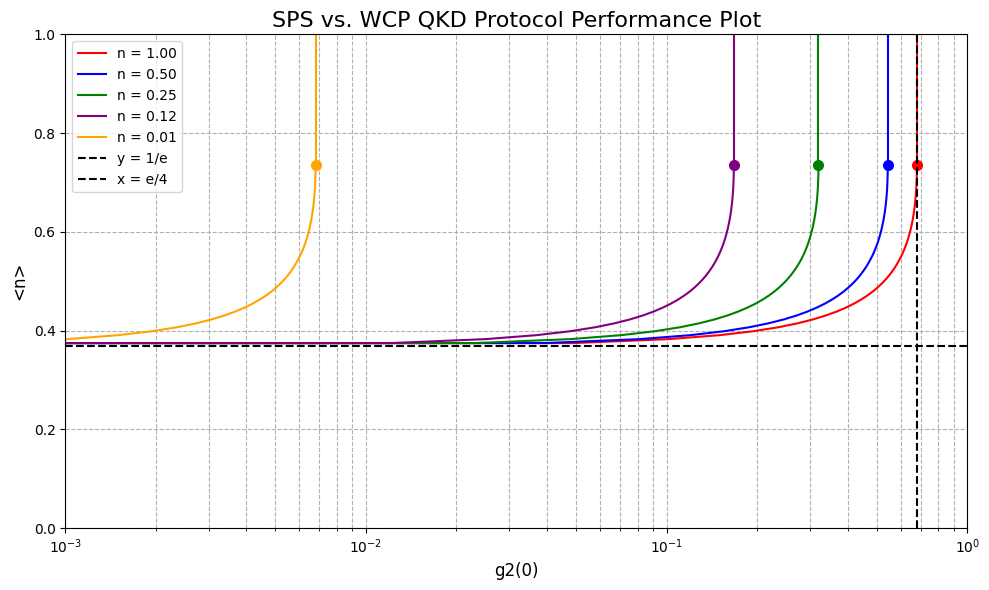

In [11]:
# Setup the plot with a logarithmic x-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
ax.set_xlim(1e-3, 1)
ax.set_ylim(0, 1)

for i, n in enumerate(n_values):
    color = colors[i % len(colors)]
    
    # Generar valores de y
    y = np.linspace(-3, 1, 500)
    
    # Calcular x
    x = 2 * n * ((y - 1/e) / (y**2 * (n**2 + 1)))

    # Recortar y para que solo vaya hasta 2/e
    mask_plot = y <= 2/e
    ax.plot(x[mask_plot], y[mask_plot], label=f'n = {n:.2f}', color=color)

    # Para la línea vertical, solo desde 2/e hasta 1
    y_line = np.linspace(2/e, 1, 100)
    x_line = ((e * n) / (2 * (n**2 + 1))) * np.ones_like(y_line)
    ax.plot(x_line, y_line, linewidth=1.5, color=color)

    # Punto en el umbral
    ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)

# --- Add the reference lines ---

# Horizontal dashed black line at y = 1/e
ax.axhline(y=1/e, color='black', linestyle='--', linewidth=1.5, label='y = 1/e')
# Vertical dashed black line at x = e/4
ax.axvline(x=e/4, color='black', linestyle='--', linewidth=1.5, label='x = e/4')

# --- Final plot settings ---

ax.set_title('SPS vs. WCP QKD Protocol Performance Plot', fontsize=16)
ax.set_xlabel('g2(0)', fontsize=12)
ax.set_ylabel('<n>', fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()